# ABU 量化系统  简介（版本 0.1）

* #### __author__ = 'BBFamily'
* ####  __email__ = 'bbfamily@126.com'
* ####  __weixin__ = 'aaaabbbuu'

## 第二部分 相关与指标

In [1]:
import ZEnv
import ZLog
import ZCommonUtil
%matplotlib inline

In [3]:
import SymbolPd

import AtrIndicator
import BollIndicator
import MacdIndicator
import ObvIndicator
import RsiIndicator
kl_pd = SymbolPd.make_kfold_pd('usNOAH')

## 1. 指标

**atr指标**

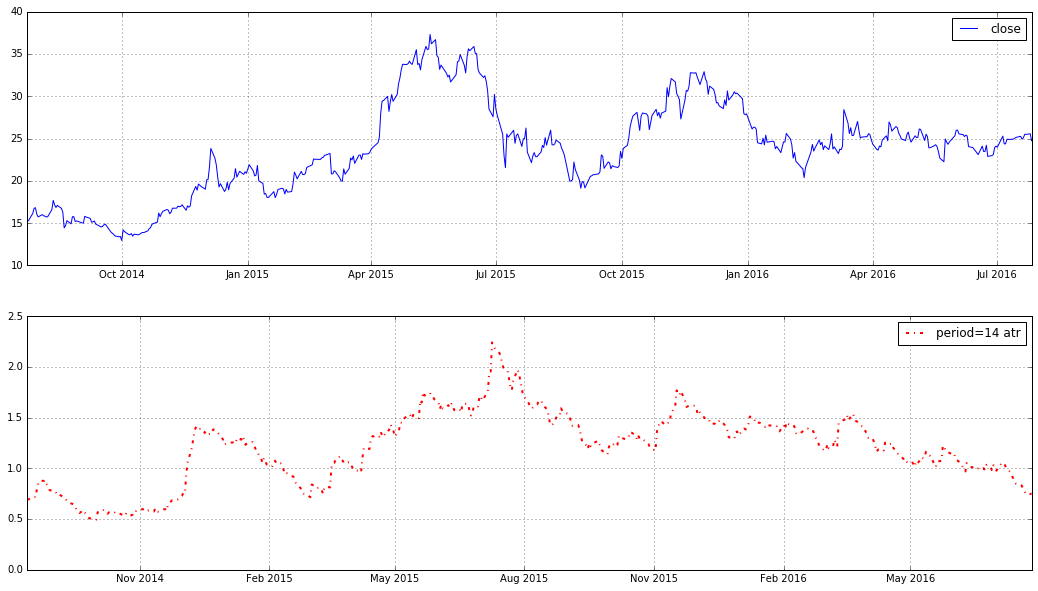

In [3]:
AtrIndicator.plot_atr_from_klpd(kl_pd)

**布林带**

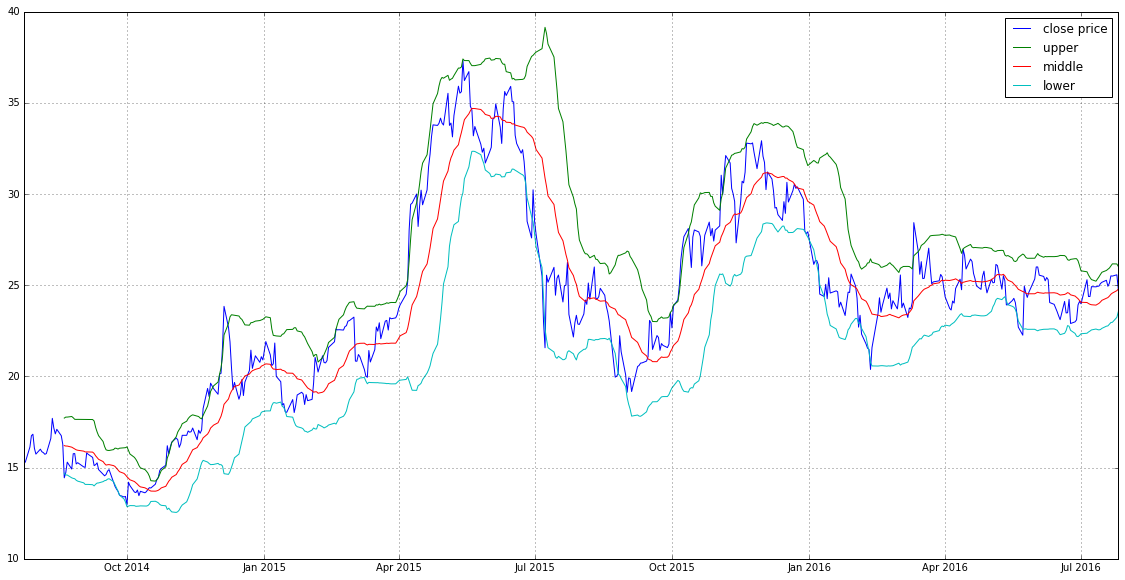

In [4]:
BollIndicator.plot_boll_from_klpd(kl_pd)

**macd指标**

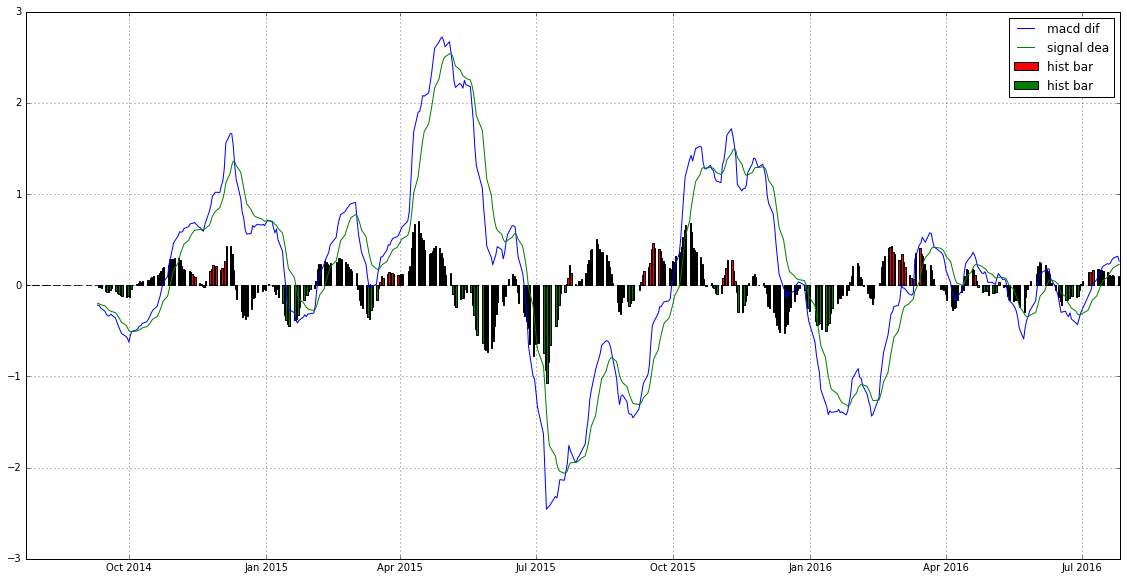

In [5]:
MacdIndicator.plot_macd_from_klpd(kl_pd)

**Obv指标**

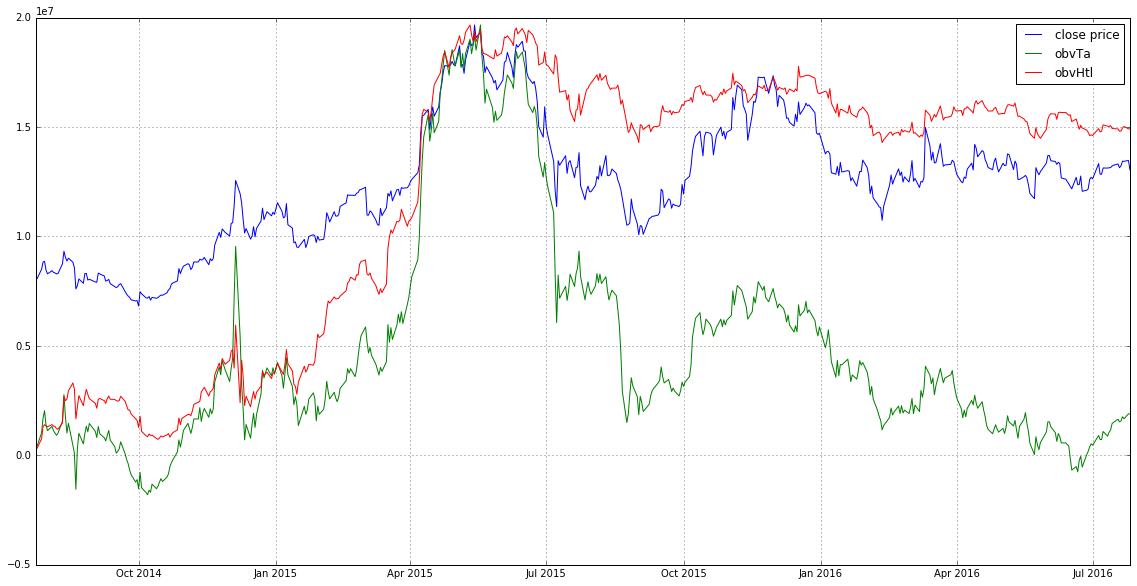

In [6]:
ObvIndicator.plot_obv_from_klpd(kl_pd)

**RSI指标**

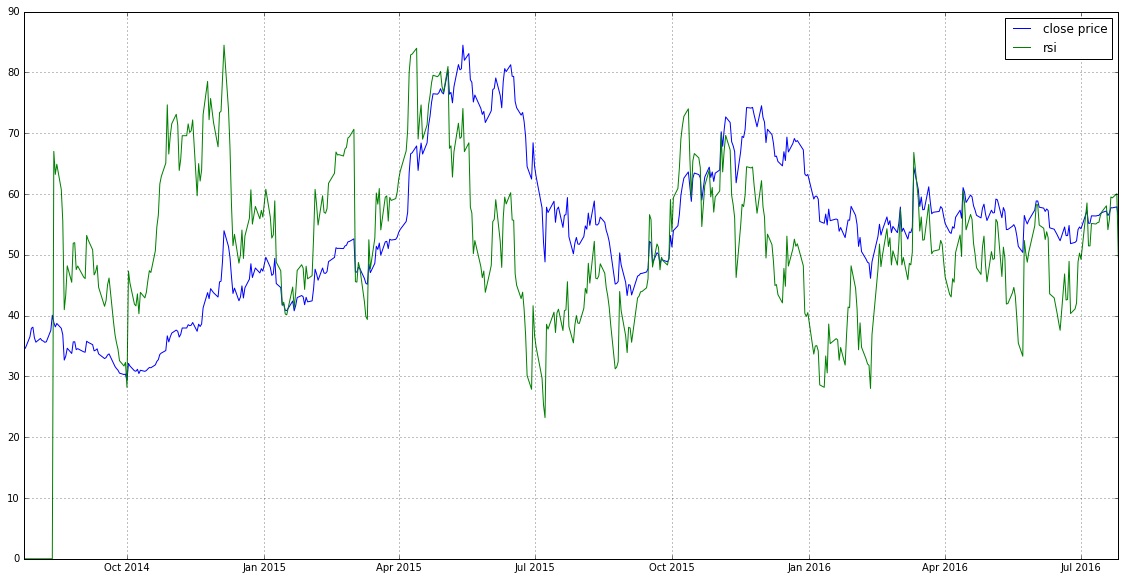

In [7]:
RsiIndicator.plot_rsi_from_klpd(kl_pd)

## 2. 相关性

支持的几种相关性：具体参看SearchCorrTask
1. 皮尔逊相关性
2. 斯皮尔曼秩相关性
3. 皮尔逊sign相关性
4. 时间线性加权相关性

### 2.1 实时比较操作
    费时，不适合张任务的回归测试，但可以在实盘中使用

In [4]:
from SimilarHelper import find_similar_with_cnt, CoreCorrType, pd_list

**皮尔逊相关，非时间线性加权，默认使用多进程方式工作，默认采用8 process，how的参数也可以是thread，或单进程模式**

[('usNOAH', 1.0), ('usSINA', 0.61013592968789809), ('usLFC', 0.55992779447230523), ('usJD', 0.55271668899289317), ('usBLK', 0.53034567009321276), ('us.INX', 0.52618164897697028), ('us.IXIC', 0.52453610276882712), ('usPTR', 0.51194546819474251), ('us.DJI', 0.51092251519517629), ('usAPH', 0.50891702667480554)]


************************************************************************************************************
show net cg ret...


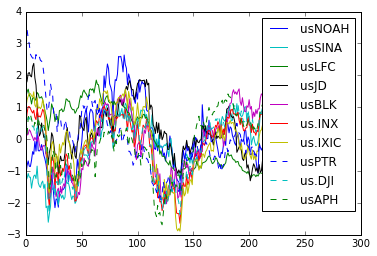

In [37]:
net_cg_ret = SimilarHelper.find_similar_with_cnt('usNOAH', 252, show_cnt=10, how='process', rolling=False,
                          show=True, corr_type=CoreCorrType.E_CORE_TYPE_PEARS.value)

皮尔逊相关，**时间线性加权** 
默认加权使用60日时间加权

[('usNOAH', 0.99999999999999967), ('usSINA', 0.56870000412170252), ('usJD', 0.53765903965465123), ('usLFC', 0.5294377349137569), ('usBLK', 0.49923974059865167), ('us.IXIC', 0.49692869829420766), ('usCTRP', 0.48716122745665835), ('usDHI', 0.48561410297294422), ('usAMP', 0.48251781042029129), ('us.INX', 0.47890377037887744)]


************************************************************************************************************
show net cg ret...


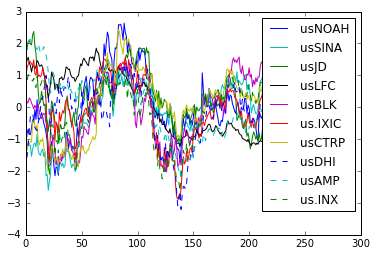

In [38]:
net_cg_ret = SimilarHelper.find_similar_with_cnt('usNOAH', 252, show_cnt=10, how='process', rolling=True,
                          show=True, corr_type=CoreCorrType.E_CORE_TYPE_PEARS.value)

**斯皮尔曼轶相关性加权**

[('usNOAH', 0.99999999999999978), ('usSINA', 0.54008994510319208), ('usAMG', 0.53164919563837731), ('usBLK', 0.52406920780532629), ('usCTRP', 0.52284033856443368), ('usJD', 0.51989268437538194), ('us.IXIC', 0.51808009750564055), ('usRJF', 0.51543054576671066), ('usLFC', 0.5120318940826416), ('us.INX', 0.51169596403057549)]


************************************************************************************************************
show net cg ret...


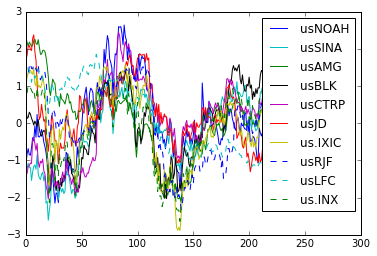

In [40]:
net_cg_ret = SimilarHelper.find_similar_with_cnt('usNOAH', 252, show_cnt=10, how='process', rolling=False,
                          show=True, corr_type=CoreCorrType.E_CORE_TYPE_SPERM.value)

net_cg_ret按照相关性排序

In [44]:
net_cg_ret[-5:], net_cg_ret[:5]

([('usCIZN', -0.10865662217854094),
  ('usELON', -0.1110607757823851),
  ('usAIII', -0.11893515495825376),
  ('usCHCI', -0.1275198806866982),
  ('usCBFV', -0.15845990225407669)],
 [('usNOAH', 0.99999999999999978),
  ('usSINA', 0.54008994510319208),
  ('usAMG', 0.53164919563837731),
  ('usBLK', 0.52406920780532629),
  ('usCTRP', 0.52284033856443368)])

### 2.2 使用缓存数据进行高效相关分析，适合长任务回归测试

        SimilarHelper －》 K_TASK_PROCESS_CNT_LIST = np.array([2, 2, 4, 8])
        控制制作缓存数据分配的进程数默认如下：
        1. 皮尔逊相关性： 2 process
        2. 斯皮尔曼秩相关性：2 process
        3. 皮尔逊sign相关性：4 process
        4. 时间线性加权相关性：8 process
        可调整参数，支持在每个进程中使用多线程继续优化加速，默认关闭的，需要可以打开g_enable_mul_thread
        
        由于时间线性加权相关性全量太过费时，一般可只做前三个

使用SimilarHelper.pd_list()加载数据, 如果不存在制作开始按照预设分配的进程数

In [15]:
import SimilarHelper
corr_pd_list = SimilarHelper.pd_list()

In [19]:
corr_pd_list[1]

,usA,usAA,usAAC,usAAMC,usAAME,usAAN,usAAOI,usAAON,usAAP,usAAT,...,usZIXI,usZLTQ,usZN,usZNGA,usZNH,usZOES,usZSAN,usZTS,usZUMZ,usZX
usA,1.000000,0.454448,0.274068,0.308121,0.055074,0.485181,0.431542,0.563792,0.382550,0.404967,...,0.296716,0.392324,0.206139,0.408661,0.400435,0.349434,0.033226,0.561841,0.314171,0.073777
usAA,0.454448,1.000000,0.187478,0.254320,-0.002108,0.376553,0.425732,0.432990,0.219294,0.220109,...,0.183560,0.147217,0.212346,0.323058,0.300355,0.311351,0.029527,0.288476,0.366425,-0.040185
usAAC,0.274068,0.187478,1.000000,0.055484,0.106134,0.216095,0.227468,0.253837,0.171094,0.195180,...,0.090673,0.252626,0.122487,0.122262,0.130185,0.092725,0.067068,0.245224,0.141494,0.010670
usAAMC,0.308121,0.254320,0.055484,1.000000,-0.075133,0.349098,0.325843,0.243445,0.201342,0.217744,...,0.167083,0.125151,0.157741,0.193929,0.207811,0.256927,0.076997,0.258660,0.173313,-0.010612
usAAME,0.055074,-0.002108,0.106134,-0.075133,1.000000,-0.097836,-0.097696,-0.012328,-0.102436,-0.067698,...,0.019000,0.026400,0.140728,0.014675,0.034938,0.038896,-0.112690,0.021150,-0.045315,-0.031935
usAAN,0.485181,0.376553,0.216095,0.349098,-0.097836,1.000000,0.310072,0.475825,0.392844,0.389914,...,0.384161,0.316591,0.159329,0.288523,0.187688,0.359479,0.168377,0.404414,0.417713,-0.008150
usAAOI,0.431542,0.425732,0.227468,0.325843,-0.097696,0.310072,1.000000,0.392092,0.236215,0.283324,...,0.285916,0.318943,0.206837,0.334249,0.301972,0.260089,0.081489,0.385113,0.302025,-0.035764
usAAON,0.563792,0.432990,0.253837,0.243445,-0.012328,0.475825,0.392092,1.000000,0.284862,0.432501,...,0.338046,0.235622,0.153639,0.359719,0.277839,0.319265,0.034376,0.434862,0.311672,0.085251
usAAP,0.382550,0.219294,0.171094,0.201342,-0.102436,0.392844,0.236215,0.284862,1.000000,0.402522,...,0.293050,0.191710,0.139599,0.142542,0.183970,0.314440,0.074700,0.277212,0.297862,0.082141
usAAT,0.404967,0.220109,0.195180,0.217744,-0.067698,0.389914,0.283324,0.432501,0.402522,1.000000,...,0.351683,0.249662,0.114396,0.216882,0.278492,0.303558,0.072374,0.385504,0.305802,0.087835


**应用**

In [25]:
import TLineSimilar

**calc_similar_top** 

按照等权重的方式计算相关性排名, 显示对比中会按照look_max方式对齐数据

    sc=slice 采用那几种相关性度量方式
    slice(1, 2)：sperman ＋ pers sign
    slice(0, 1)：pers ＋  sperman
 
最后返回的结果是rank的结果，从2开始，1是symbol自身

slice(1, 2): sperman ＋ pers sign

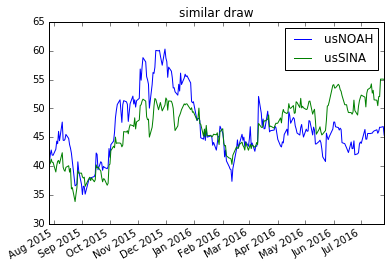

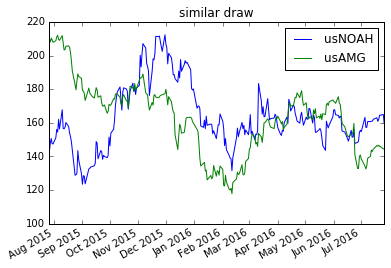

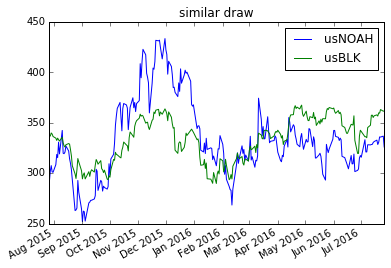

usSINA    2.0
usAMG     3.0
usBLK     4.0
dtype: float64

In [26]:
TLineSimilar.calc_similar_top('usNOAH', sc=slice(1, 2), show_cnt=3)

slice(0, 2):  pers ＋ sperman + pers_sign
可以看到结果京东的rank上来了

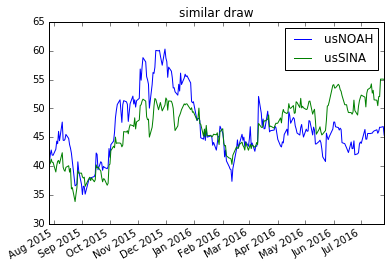

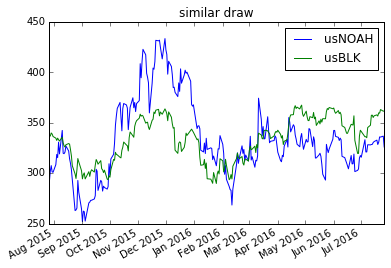

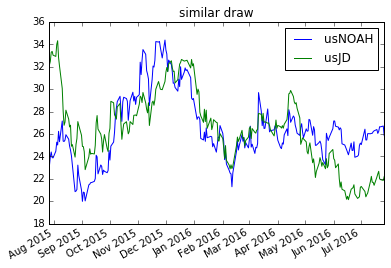

usSINA     4.0
usBLK      9.0
usJD      10.0
dtype: float64

In [27]:
TLineSimilar.calc_similar_top('usNOAH', sc=slice(0, 2), show_cnt=3)

得到对比的股票在rank中的位置分量：
    
    搜房的相关性于诺亚在总体所有股票0.84的位置上

usNOAH similar rank scoreusSFUN :0.840986202217


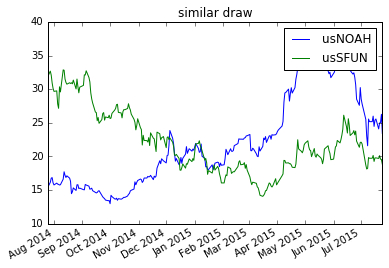

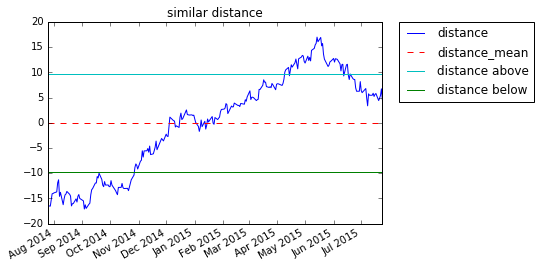

0.8409862022166931

In [32]:
TLineSimilar.calc_similar('usNOAH', 'usSFUN')

**相关与协整技术分析**

相关不一定协整
协整不一定相关

技术分析思路
从最相关的top n中寻找m个最协整的股票，现在的策略是从top 100多个
相关等权重中阀值0.08计算寻找最协整的10个股票，10个股票标准化后做
diff之后axis=1 轴上做sum，类似等权重投票机制成如

        distance_votes
        2015-07-27   -14.724491
        2015-07-28   -12.712066
        2015-07-29   -11.945266
        2015-07-30   -13.801350
        2015-07-31   -13.520431
        2015-08-03   -11.381343
        2015-08-04    -9.486645
        2015-08-05   -11.319338
        2015-08-06    -6.517725
        2015-08-07    -9.103014
        2015-08-10    -5.025694
        ......................

之后计算vote diff的above std， below std，mean,
可以根据above std， below std等作为交易信号，形成
策略因子的基础组成部份


### 更多技术分析阅读技术分析部分，在TLine模块下

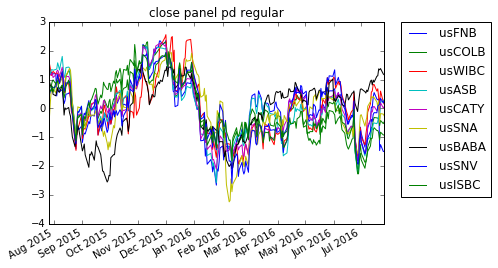

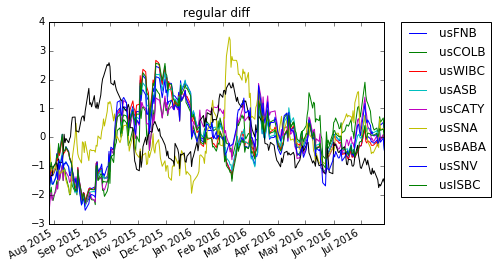

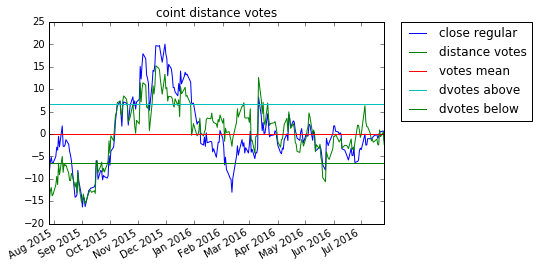

In [39]:
TLineSimilar.coint_similar('usNOAH')